In [1]:
import numpy
%pylab inline
import matplotlib as mpl
mpl.rc("savefig", dpi=120)
import os

Populating the interactive namespace from numpy and matplotlib


#Forward Euler
<bc>
$$ \sigma = D \Delta t/ \Delta x ^2 $$
$\sigma$ = F in the following code.
$$u^{t+1}_x = \sigma u^{t}_{x-1} + (1-2\sigma)u^{t}_{x} + \sigma u^{t}_{x+1} $$

0.5154639175257733


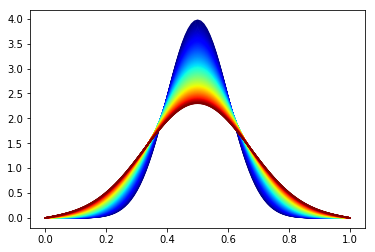

In [2]:
L = 1
Nx = 100
T = 1
Nt = 194
a = 1e-2
# Initial profile function
I = lambda x: np.sin(np.pi*x) # sine
I = lambda x,mu=0.5,sgm = 0.1: 1/(sgm*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sgm**2)) # Gaussian

x = linspace(0, L, Nx+1)    # mesh points in space
dx = x[1] - x[0]
t = linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = a*dt/dx**2
print F
u   = zeros(Nx+1)
u_1 = zeros(Nx+1)

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])
#u_1 = np.array([I(x[i]) for i in range(Nx+1)]) #This is one line for loop, very 'pythonic'

color_idx = np.linspace(0,1,Nt)
for n in range(0, Nt):
    # Compute u at inner mesh points
    for i in range(1, Nx):
        u[i] = u_1[i] + F*(u_1[i-1] - 2*u_1[i] + u_1[i+1])

    # Insert boundary conditions
    u[0] = 0;  u[Nx] = 0 # constant zero concentration at the boundary
    #u[0] = u[1];  u[Nx] = u[Nx-1] # no mass exchangge

    # Update u_1 before next step
    #u_1[:]= u
    # or more efficient switch of references
    u_1, u = u, u_1
    plot(x,u_1,color = plt.cm.jet(color_idx[n]))

#Backward Euler stencil
<bc>
$$u^{t+1}_x-u^t_x = \sigma(u^{t+1}_{x+1}-2u^{t+1}_x+u^{t+1}_{x-1})$$
<bc>
$$-\sigma u^{t+1}_{x-1} + (1+2\sigma)u^{t+1}_x -\sigma u^{t+1}_{x+1} = u^t_x $$

10.0


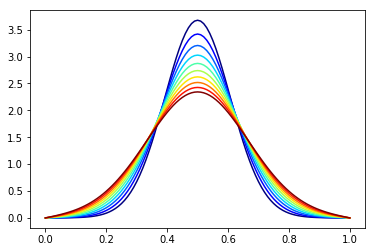

In [3]:
L = 1
Nx = 100
T = 1
Nt = 10
a = 1e-2
# Initial profile function
I = lambda x: np.sin(np.pi*x) # sine
I = lambda x,mu=0.5,sgm = 0.1: 1/(sgm*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sgm**2)) # Gaussian
x = linspace(0, L, Nx+1)   # mesh points in space
dx = x[1] - x[0]
t = linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = a*dt/dx**2
print F
u   = zeros(Nx+1)
u_1 = zeros(Nx+1)

# Data structures for the linear system
A = zeros((Nx+1, Nx+1))
b = zeros(Nx+1)

for i in range(1, Nx):
    A[i,i-1] = -F
    A[i,i+1] = -F
    A[i,i] = 1 + 2*F
A[0,0] = A[Nx,Nx] = 1

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])

import scipy.linalg
color_idx = np.linspace(0,1,Nt)
for n in range(0, Nt):
    # Compute b and solve linear system
    for i in range(1, Nx):
        b[i] = u_1[i]
    b[0] = b[Nx] = 0
    u[:] = scipy.linalg.solve(A, b)

    # Update u_1 before next step
    u_1, u = u, u_1
    plot(x,u_1,color = plt.cm.jet(color_idx[n]))

# Crank-Nicolson stencil
<bc>
$$u^{t+1}_x - u^t_x = \sigma(u^{t}_{x+1}-2u^{t}_x+u^{t}_{x-1} + u^{t+1}_{x+1}-2u^{t+1}_x+u^{t+1}_{x-1})$$
<bc>
$$-\sigma u^{t+1}_{x-1} + (1+2\sigma)u^{t+1}_x -\sigma u^{t+1}_{x+1} = \sigma u^{t}_{x-1} + (1-2\sigma)u^{t}_x +\sigma u^{t}_{x+1}  $$

10.0


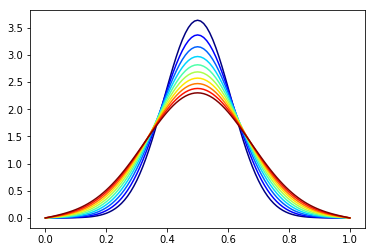

In [4]:
L = 1
Nx = 100
T = 1
Nt = 10
a = 1e-2
# Initial profile function
I = lambda x: np.sin(np.pi*x) # sine
I = lambda x,mu=0.5,sgm = 0.1: 1/(sgm*np.sqrt(2*np.pi))*np.exp(-(x-mu)**2 / (2*sgm**2)) # Gaussian
x = linspace(0, L, Nx+1)   # mesh points in space
dx = x[1] - x[0]
t = linspace(0, T, Nt+1)    # mesh points in time
dt = t[1] - t[0]
F = 0.5*a*dt/dx**2
print F*2
u   = zeros(Nx+1)
u_1 = zeros(Nx+1)

# Data structures for the linear system
A = zeros((Nx+1, Nx+1))
B = zeros((Nx+1,Nx+1))

for i in range(1, Nx):
    A[i,i-1] = -F
    A[i,i+1] = -F
    A[i,i] = 1 + 2*F
A[0,0] = A[Nx,Nx] = 1+F

for i in range(1, Nx):
    B[i,i-1] = F
    B[i,i+1] = F
    B[i,i] = 1 - 2*F
B[0,0] = B[Nx,Nx] = 1-F

# Set initial condition u(x,0) = I(x)
for i in range(0, Nx+1):
    u_1[i] = I(x[i])

import scipy.linalg
color_idx = np.linspace(0,1,Nt)
for n in range(0, Nt):
    u[:] = scipy.linalg.solve(A, B.dot(u_1))

    # Update u_1 before next step
    u_1, u = u, u_1
    plot(x,u_1,color = plt.cm.jet(color_idx[n]))